# Przegląd bazy danych

In [3]:
import pandas as pd

airlines = pd.read_csv('./data/tweets_airline.csv',usecols=['airline_sentiment', 'text'], sep=',', encoding='UTF-8')
print(airlines.head())

  airline_sentiment                                               text
0           neutral                @VirginAmerica What @dhepburn said.
1          positive  @VirginAmerica plus you've added commercials t...
2           neutral  @VirginAmerica I didn't today... Must mean I n...
3          negative  @VirginAmerica it's really aggressive to blast...
4          negative  @VirginAmerica and it's a really big bad thing...


# Analiza wizualna

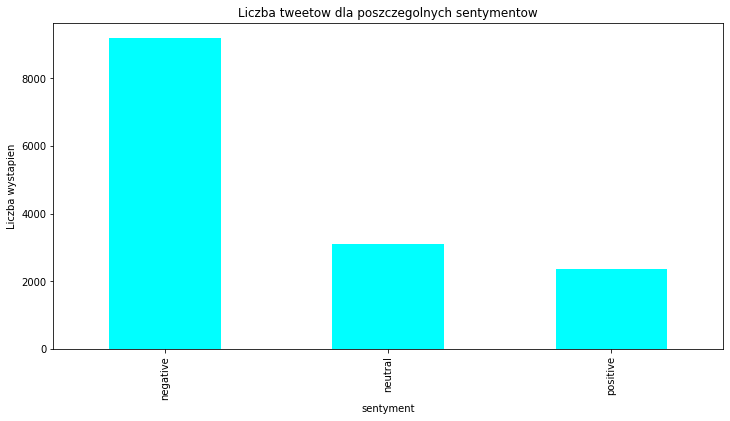

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title("Liczba tweetow dla poszczegolnych sentymentow")
airlines['airline_sentiment'].value_counts().plot.bar(color='aqua', legend=None)
plt.xlabel("sentyment")
plt.ylabel("Liczba wystapien")
plt.show()

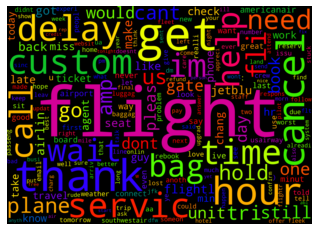

In [5]:
from funkcje import word_cloud as wc
wc.word_cloud('./data/tweets_airline.csv')

Chmura slow pozytywnych


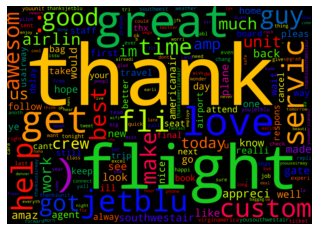

Chmura slow negatywnych


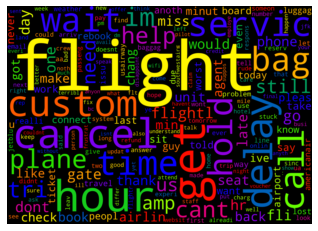

Chmura slow neutralnych


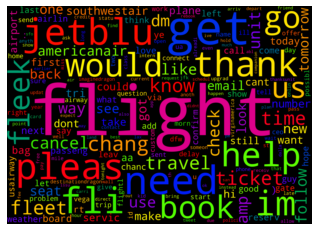

In [9]:
from funkcje import word_cloud as wc
print("Chmura slow pozytywnych")
wc.word_cloud('./data/positive.csv')
print("Chmura slow negatywnych")
wc.word_cloud('./data/negative.csv')
print("Chmura slow neutralnych")
wc.word_cloud('./data/neutral.csv')

top 10 najczęściej występujących tokenów


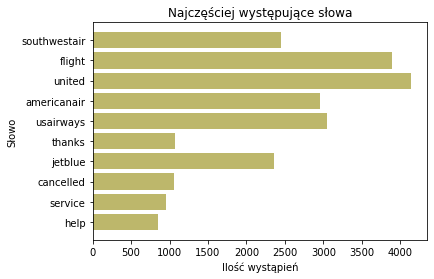

+--------------+-----------------+
|    Słowo     | Ilość wystąpień |
+--------------+-----------------+
|     help     |       855       |
|   service    |       956       |
|  cancelled   |       1056      |
|    thanks    |       1072      |
|   jetblue    |       2361      |
| southwestair |       2453      |
| americanair  |       2957      |
|  usairways   |       3051      |
|    flight    |       3895      |
|    united    |       4144      |
+--------------+-----------------+


In [6]:
from funkcje import analiza_tokenow as at
at.najczesciej_wystepujace('./data/tweets_airline.csv')

top 10 najważniejsze tokeny


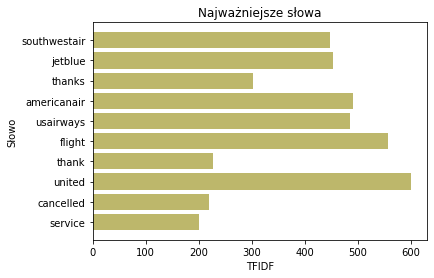

+--------------+--------------------+
|    Słowo     |   Wartosc TF-IDF   |
+--------------+--------------------+
|   service    | 199.78774723477105 |
|  cancelled   | 220.1272987380102  |
|    thank     | 226.2449319111395  |
|    thanks    | 302.5631474053868  |
| southwestair | 446.7603196907529  |
|   jetblue    | 452.3652012247567  |
|  usairways   | 485.5439991706566  |
| americanair  | 489.97213164823336 |
|    flight    | 557.4614784799761  |
|    united    | 600.9318503430823  |
+--------------+--------------------+


In [7]:
at.najwazniejsze('./data/tweets_airline.csv')

# Klasyfikatory

BaggingClassifier 
               precision    recall  f1-score   support

    negative       0.83      0.81      0.82      1835
     neutral       0.53      0.55      0.54       620
    positive       0.62      0.64      0.63       473

    accuracy                           0.73      2928
   macro avg       0.66      0.67      0.66      2928
weighted avg       0.73      0.73      0.73      2928



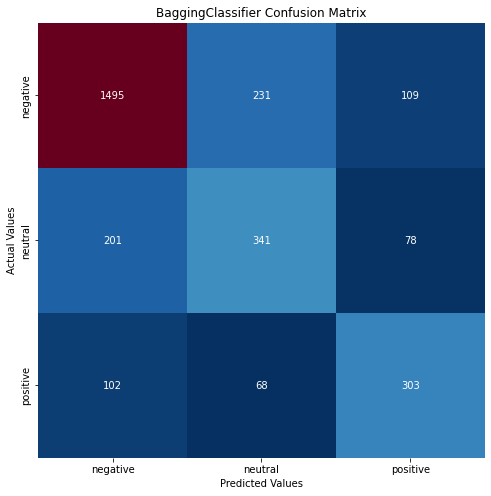

In [1]:
from funkcje import klasyfikatory as kl
kl.bagg_class()

RandomForestClassifier 
               precision    recall  f1-score   support

    negative       0.82      0.86      0.84      1835
     neutral       0.58      0.52      0.55       620
    positive       0.68      0.63      0.66       473

    accuracy                           0.75      2928
   macro avg       0.69      0.67      0.68      2928
weighted avg       0.75      0.75      0.75      2928



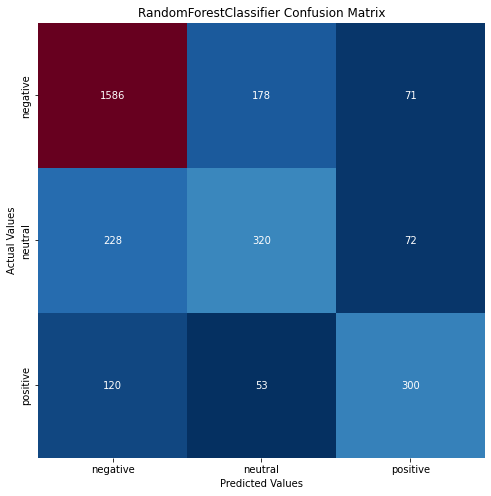

In [2]:
kl.rfc_class()

SVM  
               precision    recall  f1-score   support

    negative       0.82      0.91      0.86      1835
     neutral       0.65      0.54      0.59       620
    positive       0.77      0.63      0.69       473

    accuracy                           0.78      2928
   macro avg       0.75      0.69      0.72      2928
weighted avg       0.78      0.78      0.78      2928



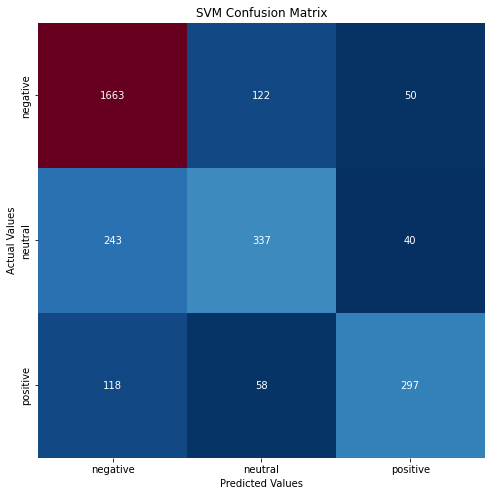

In [3]:
kl.svm_class()

DecisionTreeClassifier 
               precision    recall  f1-score   support

    negative       0.82      0.76      0.79      1835
     neutral       0.46      0.54      0.50       620
    positive       0.57      0.60      0.59       473

    accuracy                           0.69      2928
   macro avg       0.62      0.63      0.62      2928
weighted avg       0.70      0.69      0.70      2928



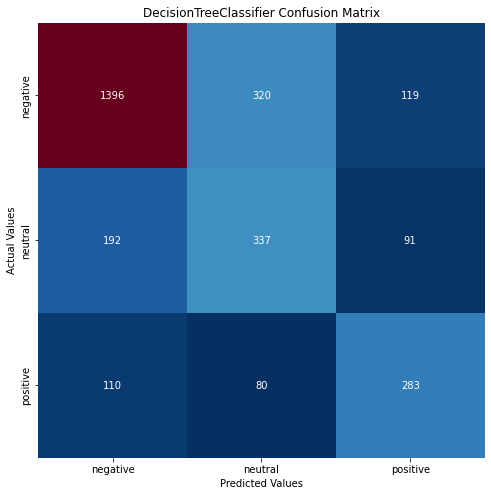

In [4]:
kl.dt_class()

AdaBoostClassifier 
               precision    recall  f1-score   support

    negative       0.78      0.88      0.83      1835
     neutral       0.52      0.36      0.43       620
    positive       0.69      0.60      0.64       473

    accuracy                           0.73      2928
   macro avg       0.66      0.62      0.63      2928
weighted avg       0.71      0.73      0.71      2928



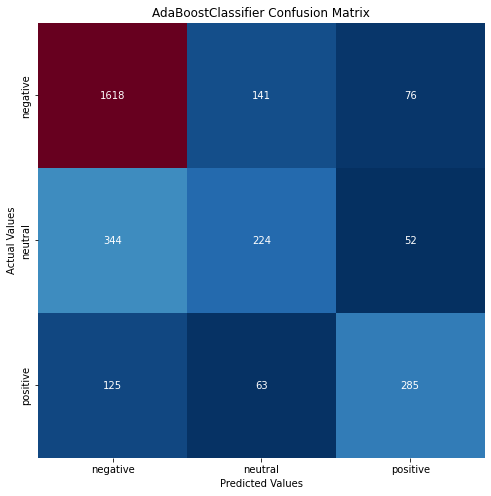

In [5]:
kl.ab_class()

Logistic Regression 
               precision    recall  f1-score   support

    negative       0.85      0.88      0.86      1835
     neutral       0.63      0.59      0.61       620
    positive       0.75      0.72      0.74       473

    accuracy                           0.79      2928
   macro avg       0.74      0.73      0.74      2928
weighted avg       0.79      0.79      0.79      2928



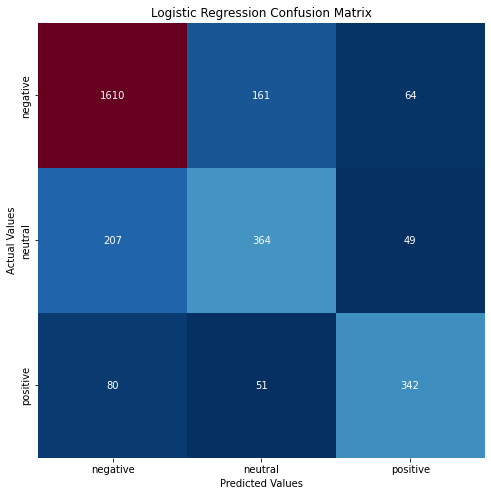

In [6]:
kl.log_reg()

## Podsumowanie klasyfikacji

Najlepszą dokładnością wykazała się Regresja Logistyczna - 79% trafonści

Precision: Spośród wszystkich tweetow, które model zdiagnozował jako 'negative', 85% z nich jest negatywnych w rzeczywistości. 75% z opinii zdiagnozowanych jako 'positive', faktycznie są opiniami pozytywnymi. 63% z opinii zdiagnozowanych jako 'neutral', faktycznie są opiniami neutralnymi.

Recall: Spośród wszystkich tweetow negatywnych, model poprwanie zdiagnozował 88% takich tweetow. Spośród wszystkich tweetow pozytywnych, model poprwanie zdiagnozował 72% takich tweetow. Spośród wszystkich tweetow neutralnych , model poprwanie zdiagnozował zaledwie 59% takich tweetow.

F1-score: Wartości Pozytywny = 0.74, Negatywny = 0.86, Neutralny = 0.61, mówią o tym jak dobrza algorytm klasyfikuje poszczególne przypadki. Algorytm w dość dobrym stopniu rozpoznaje negatywne tweety, natomiast rozpoznawalność tweetow pozytywnych oraz neutralnych jest na średnio zadowalającym poziomie, taka różnica w wynikach jest spowodowana liczebnością tweetow w poszczególnych przypadkach.